In [1]:
import pandas as pd
import numpy as np

In [11]:
au = pd.read_csv('audi.csv')

In [12]:
au

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [14]:
au["model"].nunique()

26

In [9]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
au["transmission"]=l.fit_transform(au[["transmission"]])

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
au

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,1,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,0,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,1,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,0,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,1,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,1,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,1,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,1,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,0,8646,Petrol,150,47.9,1.4


In [11]:
au.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

au = pd.read_csv('audi.csv')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the columns
au['model'] = label_encoder.fit_transform(au['model'])
au['year'] = label_encoder.fit_transform(au['year'])
au['transmission'] = label_encoder.fit_transform(au['transmission'])
au['fuelType'] = label_encoder.fit_transform(au['fuelType'])

# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding on the columns
ohc = ['model', 'year', 'transmission', 'fuelType']
encoded_features = one_hot_encoder.fit_transform(au[ohc])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(ohc))
au = pd.concat([au.drop(ohc, axis=1), encoded_df], axis=1)

# Print the updated DataFrame
print(au)

       price  mileage  tax   mpg  engineSize  model_0  model_1  model_2  \
0      12500    15735  150  55.4         1.4      1.0      0.0      0.0   
1      16500    36203   20  64.2         2.0      0.0      0.0      0.0   
2      11000    29946   30  55.4         1.4      1.0      0.0      0.0   
3      16800    25952  145  67.3         2.0      0.0      0.0      0.0   
4      17300     1998  145  49.6         1.0      0.0      0.0      1.0   
...      ...      ...  ...   ...         ...      ...      ...      ...   
10663  16999     4018  145  49.6         1.0      0.0      0.0      1.0   
10664  16999     1978  150  49.6         1.0      0.0      0.0      1.0   
10665  17199      609  150  49.6         1.0      0.0      0.0      1.0   
10666  19499     8646  150  47.9         1.4      0.0      0.0      0.0   
10667  15999    11855  150  47.9         1.4      0.0      0.0      0.0   

       model_3  model_4  ...  year_17  year_18  year_19  year_20  \
0          0.0      0.0  ...   

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(au.drop(["transmission"],axis=1),au["transmission"],test_size=0.3,random_state=42)

X_train

,model,year,price,mileage,fuelType,tax,mpg,engineSize
9360,A3,2016,10990,57097,Diesel,0,83.1,1.6
3457,A7,2017,22999,24337,Diesel,150,55.4,3.0
2758,A4,2016,14242,14900,Petrol,125,53.3,1.4
3244,Q3,2017,15998,37151,Petrol,145,51.4,1.4
4224,A6,2019,30850,4553,Diesel,145,47.9,2.0
...,...,...,...,...,...,...,...,...
5734,Q7,2017,47450,38513,Diesel,300,39.2,4.0
5191,A4,2017,13490,35543,Petrol,145,53.3,1.4
5390,A4,2019,23766,9893,Diesel,145,48.7,2.0
860,A1,2020,20990,556,Petrol,145,47.9,1.0


In [14]:
X_train

,model,year,price,mileage,fuelType,tax,mpg,engineSize
10442,A4,2012,9990,49500,Diesel,30,62.8,2.0
2907,A3,2019,22382,4352,Diesel,145,51.4,1.6
7388,A6,2019,28990,7000,Diesel,150,47.9,2.0
3016,A3,2020,30777,3925,Petrol,145,44.1,1.5
7890,A4,2016,14950,22000,Petrol,145,51.4,1.4
...,...,...,...,...,...,...,...,...
10399,A3,2019,20500,5530,Diesel,145,51.4,1.6
749,A8,2018,37000,10296,Diesel,145,50.4,3.0
7726,A3,2019,21432,14508,Petrol,145,42.2,1.5
2373,Q3,2019,27280,3000,Diesel,145,42.8,2.0


In [30]:
X_test

,model,year,price,mileage,fuelType,tax,mpg,engineSize
10442,A4,2012,9990,49500,Diesel,30,62.8,2.0
2907,A3,2019,22382,4352,Diesel,145,51.4,1.6
7388,A6,2019,28990,7000,Diesel,150,47.9,2.0
3016,A3,2020,30777,3925,Petrol,145,44.1,1.5
7890,A4,2016,14950,22000,Petrol,145,51.4,1.4
...,...,...,...,...,...,...,...,...
10399,A3,2019,20500,5530,Diesel,145,51.4,1.6
749,A8,2018,37000,10296,Diesel,145,50.4,3.0
7726,A3,2019,21432,14508,Petrol,145,42.2,1.5
2373,Q3,2019,27280,3000,Diesel,145,42.8,2.0


In [15]:
y_train

9360       Manual
3457    Semi-Auto
2758       Manual
3244       Manual
4224    Automatic
          ...    
5734    Automatic
5191       Manual
5390    Semi-Auto
860        Manual
7270    Semi-Auto
Name: transmission, Length: 7467, dtype: object

**Standard Scaler or Z-score standardization**

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'fuelType']

# Perform one-hot encoding for categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[numeric_features])
X_test_scaled = scaler.transform(X_test_encoded[numeric_features])

In [33]:
X_train_scaled

array([[-0.51970736,  1.37924551, -1.88582809,  2.44536463, -0.55479995],
       [-0.05153812, -0.01991388,  0.3567074 ,  0.34467213,  1.7702222 ],
       [-0.51970736, -0.42296233, -0.01704852,  0.18541386, -0.88694598],
       ...,
       [ 0.88480036, -0.63680821,  0.28195622, -0.1634376 ,  0.10949209],
       [ 1.3529696 , -1.03558572,  0.28195622, -0.22410742, -1.55123802],
       [ 0.88480036, -0.98275421,  0.28195622, -0.45920297, -0.72087297]])

In [35]:
X_train.describe()

,year,price,mileage,tax,mpg,engineSize
count,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000
mean,2017.110084,22893.545333,24803.264765,126.140351,50.855109,1.934070
std,2.136123,11670.296406,23415.626678,66.893053,13.187011,0.602185
min,1998.000000,1699.000000,1.000000,0.000000,19.300000,0.000000
25%,2016.000000,15286.000000,5800.000000,125.000000,40.900000,1.500000
50%,2017.000000,20444.000000,19158.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36448.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,5.200000


In [36]:
np.round(X_train.describe(),1)

,year,price,mileage,tax,mpg,engineSize
count,7467.0,7467.0,7467.0,7467.0,7467.0,7467.0
mean,2017.1,22893.5,24803.3,126.1,50.9,1.9
std,2.1,11670.3,23415.6,66.9,13.2,0.6
min,1998.0,1699.0,1.0,0.0,19.3,0.0
25%,2016.0,15286.0,5800.0,125.0,40.9,1.5
50%,2017.0,20444.0,19158.0,145.0,49.6,2.0
75%,2019.0,27990.0,36448.0,145.0,58.9,2.0
max,2020.0,145000.0,323000.0,580.0,188.3,5.2


**Scaling using matplotlib**

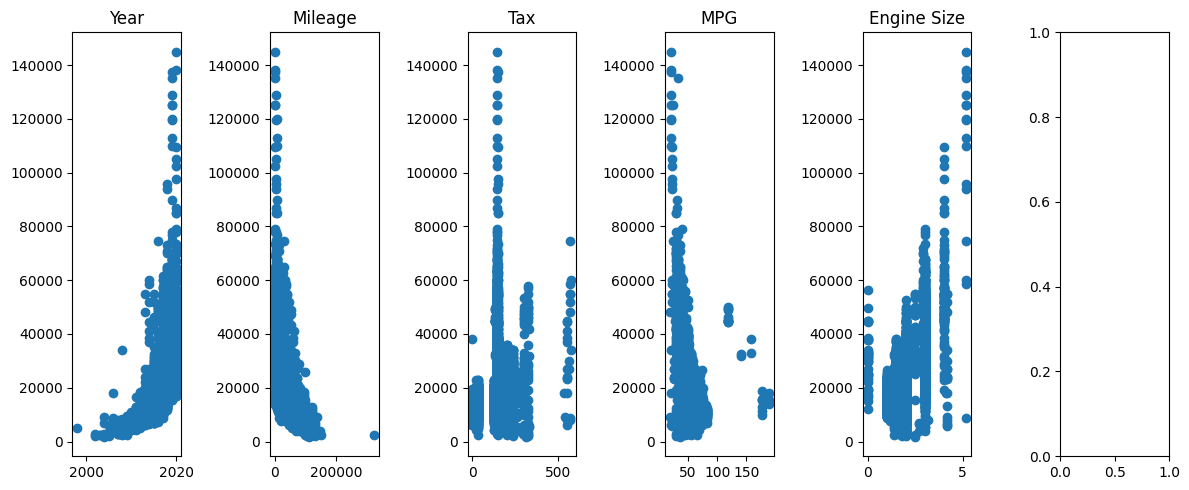

In [45]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=6, figsize=(12, 5))
a1, a2, a3, a4, a5, a6 = axs
a1.scatter(X_train["year"], X_train["price"])
a2.scatter(X_train["mileage"], X_train["price"])
a3.scatter(X_train["tax"], X_train["price"])
a4.scatter(X_train["mpg"], X_train["price"])
a5.scatter(X_train["engineSize"], X_train["price"])

a1.set_title("Year")
a2.set_title("Mileage")
a3.set_title("Tax")
a4.set_title("MPG")
a5.set_title("Engine Size")

plt.tight_layout()
plt.show()

**MinMax Scaler or Normalization**

In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select the features and target variables
numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model',  'fuelType']

# Perform one-hot encoding for categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Normalize the numeric features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[numeric_features])
X_test_scaled = scaler.transform(X_test_encoded[numeric_features])

In [49]:
X_train_scaled

array([[0.81818182, 0.17676835, 0.        , 0.37751479, 0.30769231],
       [0.86363636, 0.07534389, 0.25862069, 0.21360947, 0.57692308],
       [0.81818182, 0.04612708, 0.21551724, 0.20118343, 0.26923077],
       ...,
       [0.95454545, 0.03062548, 0.25      , 0.1739645 , 0.38461538],
       [1.        , 0.00171827, 0.25      , 0.16923077, 0.19230769],
       [0.95454545, 0.005548  , 0.25      , 0.15088757, 0.28846154]])

In [50]:
X_train.describe()

,year,price,mileage,tax,mpg,engineSize
count,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000
mean,2017.110084,22893.545333,24803.264765,126.140351,50.855109,1.934070
std,2.136123,11670.296406,23415.626678,66.893053,13.187011,0.602185
min,1998.000000,1699.000000,1.000000,0.000000,19.300000,0.000000
25%,2016.000000,15286.000000,5800.000000,125.000000,40.900000,1.500000
50%,2017.000000,20444.000000,19158.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36448.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,5.200000


In [51]:
np.round(X_train.describe(),1)

,year,price,mileage,tax,mpg,engineSize
count,7467.0,7467.0,7467.0,7467.0,7467.0,7467.0
mean,2017.1,22893.5,24803.3,126.1,50.9,1.9
std,2.1,11670.3,23415.6,66.9,13.2,0.6
min,1998.0,1699.0,1.0,0.0,19.3,0.0
25%,2016.0,15286.0,5800.0,125.0,40.9,1.5
50%,2017.0,20444.0,19158.0,145.0,49.6,2.0
75%,2019.0,27990.0,36448.0,145.0,58.9,2.0
max,2020.0,145000.0,323000.0,580.0,188.3,5.2


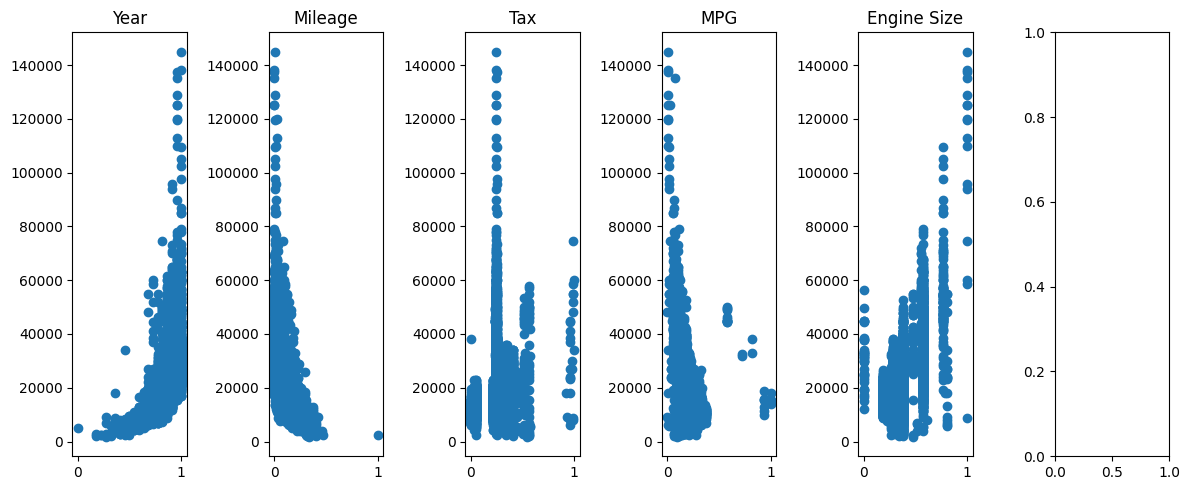

In [52]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=6, figsize=(12, 5))
a1, a2, a3, a4, a5, a6 = axs

# Assuming you have used MinMaxScaler and obtained X_train_scaled

a1.scatter(X_train_scaled[:, 0], X_train["price"])
a2.scatter(X_train_scaled[:, 1], X_train["price"])
a3.scatter(X_train_scaled[:, 2], X_train["price"])
a4.scatter(X_train_scaled[:, 3], X_train["price"])
a5.scatter(X_train_scaled[:, 4], X_train["price"])

a1.set_title("Year")
a2.set_title("Mileage")
a3.set_title("Tax")
a4.set_title("MPG")
a5.set_title("Engine Size")

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example data
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)

# Label encoding
label_encoder = LabelEncoder()
df['LabelEncoded'] = label_encoder.fit_transform(df['Color'])

# One-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Color']])
df_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Color']))
df = pd.concat([df, df_one_hot], axis=1)

print("Label Encoding:")
print(df[['Color', 'LabelEncoded']])

print("\nOne-Hot Encoding:")
print(df[['Color', 'Color_Red', 'Color_Blue', 'Color_Green']])

Label Encoding:
   Color  LabelEncoded
0    Red             2
1   Blue             0
2  Green             1
3    Red             2
4   Blue             0

One-Hot Encoding:
   Color  Color_Red  Color_Blue  Color_Green
0    Red        1.0         0.0          0.0
1   Blue        0.0         1.0          0.0
2  Green        0.0         0.0          1.0
3    Red        1.0         0.0          0.0
4   Blue        0.0         1.0          0.0


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
